# 这里做的是显示图片及其直方图

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1920x1080 at 0x5EF7006D68>


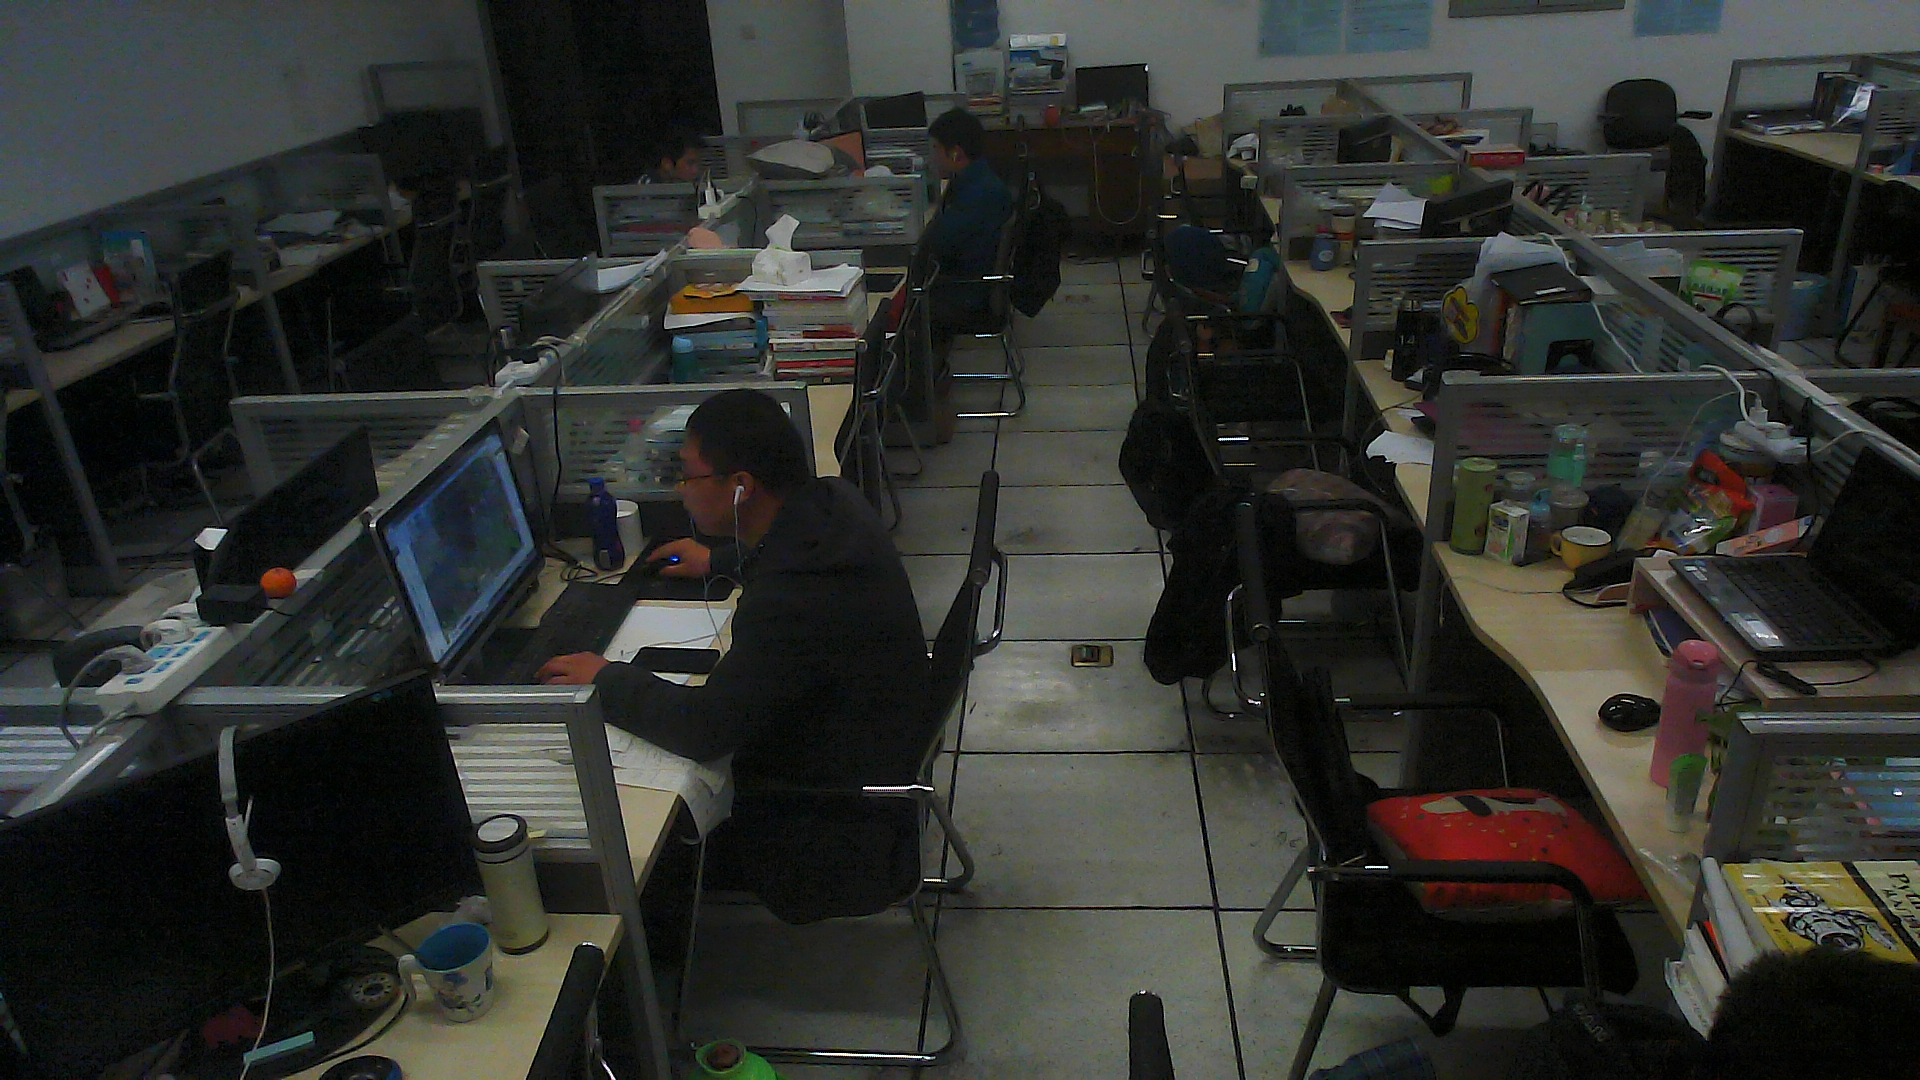

In [18]:
from PIL import Image

img = Image.open('C:\\Users\\SiChen\\opencv1.png')  #我做过实验了，opencv1.png本身读取为img后就是RGB格式的
#img.resize((256,256)).convert('rgb') 
print(img)
img

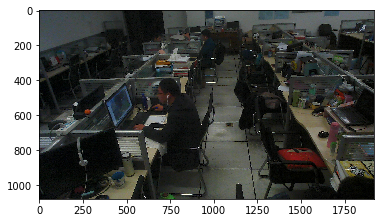

In [20]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('C:\\Users\\SiChen\\opencv1.png') 
plt.imshow(img)      #绘制图像image
#plt.axis("off")     #加上这行，可以去掉坐标轴
plt.show()           #需要调用show()方法，不然图像只会在内存中而不显示出来

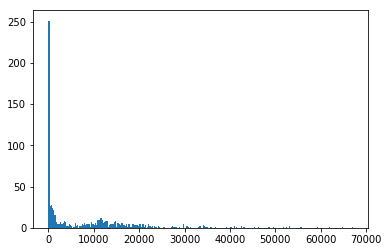

In [21]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('C:\\Users\\SiChen\\opencv1.png') 
hist = img.histogram()       #这一行用的是Image库的histogram()函数
plt.hist(hist,256)
plt.show()

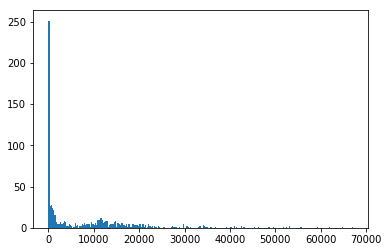

In [23]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open('C:\\Users\\SiChen\\opencv1.png') 
hist = img.histogram()       
plt.hist(np.array(hist).flatten(),256)
plt.show()

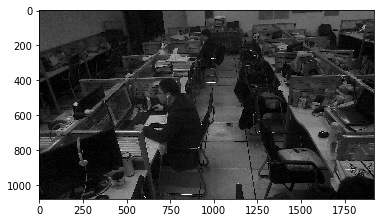

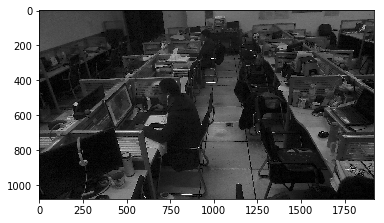

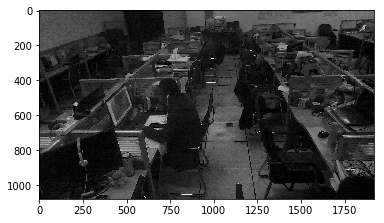

In [25]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open('C:\\Users\\SiChen\\opencv1.png')
r,g,b = img.split()      #说明这个函数，可以将图片变为r、g、b三个通道


plt.imshow(r)
plt.show()
plt.imshow(g)
plt.show()
plt.imshow(b)
plt.show()

d:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\pyplot.py:3023: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)
d:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


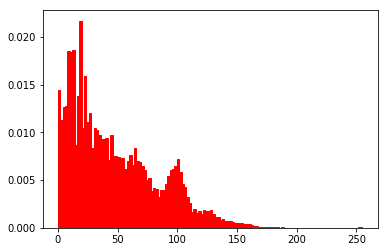

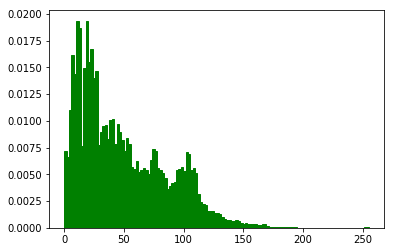

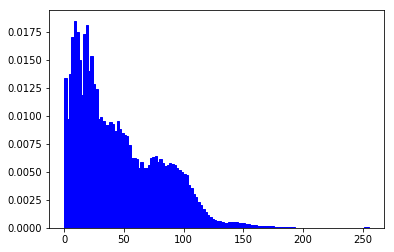

In [36]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open('C:\\Users\\SiChen\\opencv1.png')
r,g,b = img.split()  

#plt.figure("opencv1.png")   给显示的图片命名，在jupyter中不显示
array_r = np.array(r).flatten()
plt.hist(array_r,bins=128,normed=1,facecolor='r',edgecolor='r',hold=1)  #参数hold=1表示可以叠加，但是下面的红框也说了，这个参数已经被抛弃了since 2.0
plt.show()
array_g = np.array(g).flatten()
plt.hist(array_g,bins=128,normed=1,facecolor='g',edgecolor='g',hold=1)
plt.show()
array_b = np.array(b).flatten()
plt.hist(array_b,bins=128,normed=1,facecolor='b',edgecolor='b',hold=1)
plt.show()

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open('C:\\Users\\SiChen\\opencv1.png')
img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)

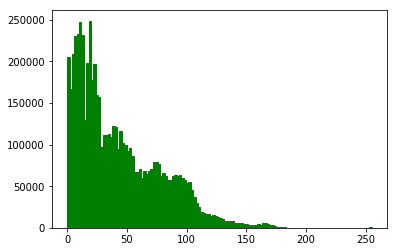

d:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


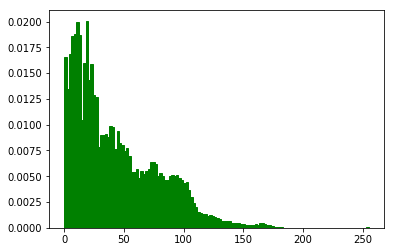

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open('C:\\Users\\SiChen\\Desktop\\opencv15.png')
#r,g,b = img.split() 

array_img = np.array(img).flatten()
plt.hist(array_img,bins=128,facecolor='g',edgecolor='g')
plt.show()
array_img = np.array(img).flatten()
plt.hist(array_img,bins=128,normed=1,facecolor='g',edgecolor='g')
plt.show()

# 下面做的是直方图的均衡

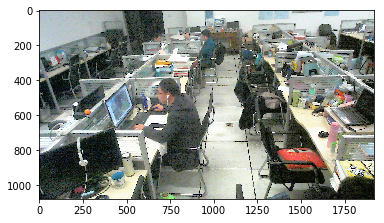

In [83]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open('C:\\Users\\SiChen\\opencv1.png')

array_img = np.array(img).flatten()
#hist,bins = np.histogram(array_img,255)      #加上density=1，就变成了概率了
hist,bins = np.histogram(array_img,256,density=1)   #输入的第二个参数表示长柱条的数目，256个值有255个长柱条，例如0-1只是一个长柱条，要减1
#cdf = hist.cumsum()
#cdf = (255.0/cdf[-1])*cdf
#print(bins)  bins即得到的图的横坐标
#print(hist)  hist即每个区间的像素点的个数

cdf = hist.cumsum()
#print(cdf)
#img_new = int(np.array(cdf)*255)
#img_new

cdf1=(cdf*255).astype(np.int32)
for i in range(len(array_img)):
#    print(array_img[i])
    array_img[i] = cdf1[array_img[i]]
#    print(i)
img1 = array_img.reshape(np.array(img).shape)
plt.imshow(img1)
plt.show()

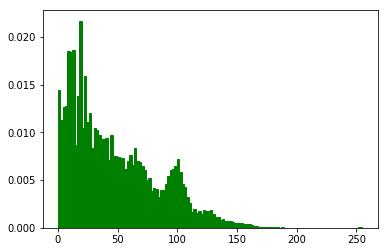

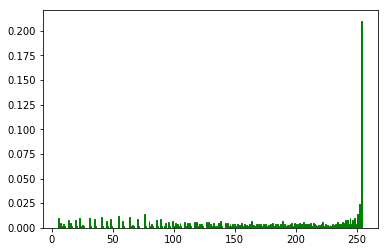

IndexError: tuple index out of range

In [92]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def histeq(img,img_bins=256):
    img_hist,bins = np.histogram(img.flatten(),img_bins)
    cdf = img_hist.cumsum()
    cdf = (255.0/cdf[-1])*cdf
    img_hist = np.interp(img.flatten(),bins[:-1],cdf)  #bins忘加s了，老是报interp()函数的错，好难找错误的原因啊
    return img_hist.reshape(img.shape),cdf

img = Image.open('C:\\Users\\SiChen\\opencv1.png')
r,g,b = img.split()
array_r = np.array(r).flatten()
plt.hist(array_r,bins=128,density=1,facecolor='g',edgecolor='g')  
plt.show()

array_r_avr = histeq(array_r)
plt.hist(array_r_avr,bins=128,density=1,facecolor='g',edgecolor='g')
plt.show()

plt.imshow(Image.fromarray(array_r_avr))

plt.show()

In [100]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

#img = cv2.imread('C:\\Users\\SiChen\\opencv1.png')
img = Image.open('C:\\Users\\SiChen\\opencv1.png')
r,g,b = img.split()
array_r = np.array(r)
equ = cv2.equalizeHist(array_r)
res = np.hstack((array_r,equ)) 
#cv2.imwrite('res2.png',res)

array_g = np.array(g)
equ = cv2.equalizeHist(array_r)
res = np.hstack((array_g,equ)) 
#cv2.imwrite('res2.png',res)

array_b = np.array(b)
equ = cv2.equalizeHist(array_r)
res = np.hstack((array_b,equ)) #stacking images side-by-side
#cv2.imwrite('res2.png',res)
cat



True

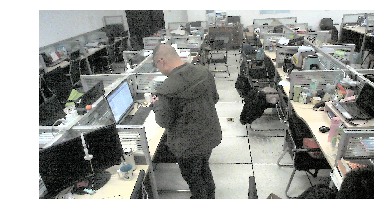

In [4]:
#就用这个吧，速度快。基于直方图均衡的图像增强
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread('C:\\Users\\SiChen\\Desktop\\newfolder3\\opencv16.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_to_yuv = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
hist_equalization_result = cv2.cvtColor(img_to_yuv,cv2.COLOR_YUV2RGB)

cv2.imwrite('result15.jpg',hist_equalization_result)

plt.imshow(hist_equalization_result)
plt.axis("off")
plt.show()

# 下面要做基于直方图的相似性检测了

In [12]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy.spatial import distance as dist

SCIPY_METHODS = (
    ("Euclidean",dist.euclidean),
    ("Manhattan",dist.cityblock),
    ("Chebysev", dist.chebyshev))

img_bgr = cv2.imread('C:\\Users\\SiChen\\Desktop\\opencv15.png')
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
hist = cv2.calcHist([img_bgr], [0, 1, 2], None, [128, 128, 128],[0, 256, 0, 256, 0, 256])
hist = cv2.normalize(hist,hist) .flatten()

img_bgr1 = cv2.imread('C:\\Users\\SiChen\\Desktop\\opencv14.png')
img_rgb1 = cv2.cvtColor(img_bgr1,cv2.COLOR_BGR2RGB)
hist1 = cv2.calcHist([img_bgr1], [0, 1, 2], None, [128, 128, 128],[0, 256, 0, 256, 0, 256])
hist1 = cv2.normalize(hist1,hist1) .flatten()

d = dist.euclidean(hist,hist1)
#d = dist.cityblock(hist,hist1)
#d = dist.chebyshev(hist,hist1)
d
#无论把bins调为多少，效果都很差，可能总体的变化太小了
#只能分成多个区了，有一个区大于某个值，就算是发生了运动，
#感觉分成很多区也不见得有用，主要是没有区分度，差距太小了。
#去研究三帧法了

0.10180149227380753

# 帧间法研究物体的运动

(1080, 1920, 3)
(1080, 1920)
[[False  True False ...  True  True  True]
 [False False False ... False  True  True]
 [False False False ... False False  True]
 ...
 [False False False ... False False False]
 [False False  True ... False False False]
 [False False  True ... False False False]]


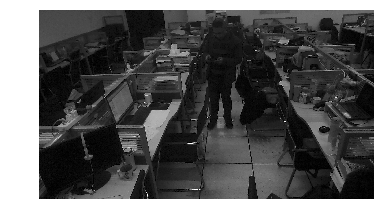

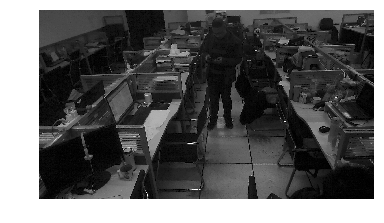

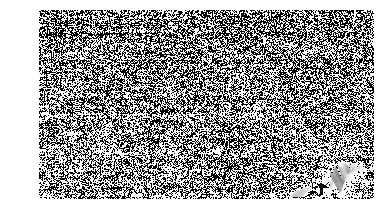

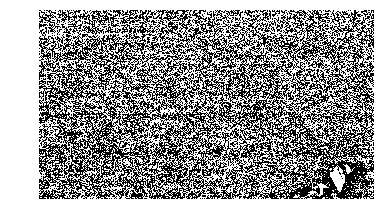

In [187]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

img_bgr = cv2.imread('C:\\Users\\SiChen\\Desktop\\opencv14.png')
img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)

img_bgr1 = cv2.imread('C:\\Users\\SiChen\\Desktop\\opencv9.png')
img_gray1 = cv2.cvtColor(img_bgr1,cv2.COLOR_BGR2GRAY)
print(img_bgr1.shape)
print(img_gray1.shape)

img_difgray = img_gray1 - img_gray

img_binary = (img_difgray < 200)
print(img_binary)
plt.imshow(img_gray, cmap='gray')
plt.axis("off")
plt.show()

plt.imshow(img_gray1, cmap='gray')
plt.axis("off")
plt.show()


plt.imshow(img_difgray, cmap='gray')
plt.axis("off")
plt.show()

plt.imshow(img_binary, cmap='gray')
plt.axis("off")
plt.show()

(1080, 1920)


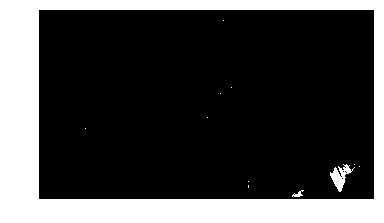

[    0     0     0 ... 10936 10936 10936]


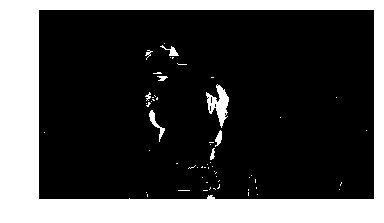

[    0     0     0 ... 32735 32735 32735]


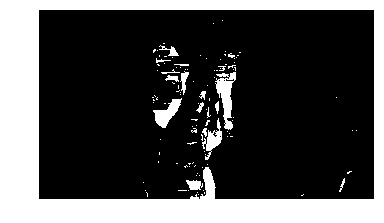

[    0     0     0 ... 82082 82082 82082]


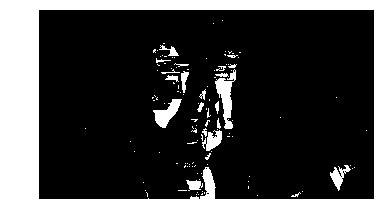

[    0     0     0 ... 87997 87997 87997]


In [214]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

img_bgr0 = cv2.imread('C:\\Users\\SiChen\\Desktop\\newfolder3\\opencv1.png',0)
#img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)

img_bgr1 = cv2.imread('C:\\Users\\SiChen\\Desktop\\newfolder3\\opencv2.png',0)
#img_gray1 = cv2.cvtColor(img_bgr1,cv2.COLOR_BGR2GRAY)
print(img_bgr1.shape)
#print(img_gray1.shape)

img_bgr2 = cv2.imread('C:\\Users\\SiChen\\Desktop\\newfolder3\\opencv16.png',0)
#img_gray1 = cv2.cvtColor(img_bgr1,cv2.COLOR_BGR2GRAY)

img_bgr3 = cv2.imread('C:\\Users\\SiChen\\Desktop\\newfolder3\\opencv17.png',0)
'''
img_difgray0 = img_bgr1 - img_bgr0
img_difgray1 = img_bgr2 - img_bgr1

img_difgray = img_difgray1 - img_difgray0

img_binary = (img_difgray)
print(img_binary)
plt.imshow(img_binary, cmap='gray')
plt.axis("off")
plt.show()
'''
frame = cv2.absdiff(img_bgr1,img_bgr0)
frame = (frame > 50)
plt.imshow(frame, cmap='gray')
plt.axis("off")
plt.show()
print(frame.cumsum())


frame = cv2.absdiff(img_bgr3,img_bgr2)
frame = (frame > 50)
plt.imshow(frame, cmap='gray')
plt.axis("off")
plt.show()
print(frame.cumsum())

frame = cv2.absdiff(img_bgr2,img_bgr0)
frame = (frame > 50)
plt.imshow(frame, cmap='gray')
plt.axis("off")
plt.show()
print(frame.cumsum())

frame = cv2.absdiff(img_bgr2,img_bgr1)
frame = (frame > 50)
plt.imshow(frame, cmap='gray')
plt.axis("off")
plt.show()
print(frame.cumsum())

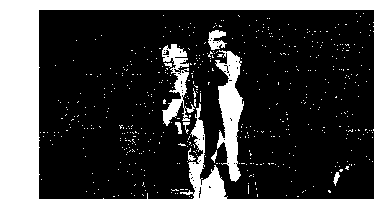

180316


In [6]:
import cv2

img_bgr0 = cv2.imread('C:\\Users\\SiChen\\Desktop\\opencv9.png',0)
img_bgr1 = cv2.imread('C:\\Users\\SiChen\\Desktop\\opencv15.png',0)

frame = cv2.absdiff(img_bgr1,img_bgr0)
frame = (frame > 20)
plt.imshow(frame, cmap='gray')
plt.axis("off")
plt.show()
print(frame.cumsum().max())

In [239]:
import cv2

for i in range(1,26):
    name = "C:\\Users\\SiChen\\Desktop\\newfolder4\\"+ "opencv"+str(i)+".png"
    print(name)
    img_bgr1 = cv2.imread(name,0)
    if i == 1:
        img_bgr0 = img_bgr1
        
    frame = cv2.absdiff(img_bgr1,img_bgr0)
    img_bgr0 = img_bgr1
    frame = (frame > 50)
    print(i,frame.cumsum().max())

C:\Users\SiChen\Desktop\newfolder4\opencv1.png
1 0
C:\Users\SiChen\Desktop\newfolder4\opencv2.png
2 7769
C:\Users\SiChen\Desktop\newfolder4\opencv3.png
3 16285
C:\Users\SiChen\Desktop\newfolder4\opencv4.png
4 15004
C:\Users\SiChen\Desktop\newfolder4\opencv5.png
5 16109
C:\Users\SiChen\Desktop\newfolder4\opencv6.png
6 15206
C:\Users\SiChen\Desktop\newfolder4\opencv7.png
7 15308
C:\Users\SiChen\Desktop\newfolder4\opencv8.png
8 12747
C:\Users\SiChen\Desktop\newfolder4\opencv9.png
9 17732
C:\Users\SiChen\Desktop\newfolder4\opencv10.png
10 41244
C:\Users\SiChen\Desktop\newfolder4\opencv11.png
11 33724
C:\Users\SiChen\Desktop\newfolder4\opencv12.png
12 23505
C:\Users\SiChen\Desktop\newfolder4\opencv13.png
13 28513
C:\Users\SiChen\Desktop\newfolder4\opencv14.png
14 25496
C:\Users\SiChen\Desktop\newfolder4\opencv15.png
15 13287
C:\Users\SiChen\Desktop\newfolder4\opencv16.png
16 51752
C:\Users\SiChen\Desktop\newfolder4\opencv17.png
17 16003
C:\Users\SiChen\Desktop\newfolder4\opencv18.png
18 366